In [108]:
import torch
from torch import nn #(https://docs.pytorch.org/docs/stable/nn.html)
import matplotlib.pyplot as plt

print("PyTorch version:", torch.__version__)


PyTorch version: 2.5.1+cu121


In [109]:
def get_device(prefer_gpu=True, index=0, verbose=True):
    if prefer_gpu and torch.cuda.is_available():
        device = torch.device(f"cuda:{index}")
    else:
        device = torch.device("cpu")
    if verbose:
        print(f"Using device: {device}")
    return device

device = get_device(prefer_gpu=True, index=0, verbose=True)

Using device: cuda:0


## 📌 **Linear Regression 
---
### ✅ **1️⃣ Model Equation**
The **hypothesis function** for simple linear regression is:
$$
\hat{y} = wx + b
$$
* $\hat{y}$ — predicted output
* $x$ — input feature (independent variable)
* $w$ — weight (slope)
* $b$ — bias (intercept)
---
**💡 Intuition:**
* **Weight $w$** controls how much the input $x$ influences the output.
* **Bias $b$** shifts the line up or down to fit the data.
---
### ✅ **2️⃣ Dataset**
Suppose we have $m$ training examples:
$$
\{(x^{(i)}, y^{(i)})\}_{i=1}^m
$$
* $x^{(i)}$ — input of example $i$
* $y^{(i)}$ — actual target of example $i$
---
### ✅ **3️⃣ Cost Function (MSE)**
We use **Mean Squared Error (MSE)** to measure how good our line is:
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big)^2
= \frac{1}{2m} \sum_{i=1}^{m} \Big( wx^{(i)} + b - y^{(i)} \Big)^2
$$
* $J(w,b)$ — cost (loss)
* The factor $\frac{1}{2}$ makes the math cleaner for derivatives.
---
### ✅ **4️⃣ Goal**
Find $w$ and $b$ that **minimize** the cost function $J(w, b)$.
In other words, find the line that best fits the training data.
---
### ✅ **5️⃣ Gradient Descent Update Rules**
To minimize $J$, we compute the gradients (partial derivatives) and update:
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \Big( \hat{y}^{(i)} - y^{(i)} \Big)
$$
**Update step for each iteration:**
$$
w := w - \alpha \frac{\partial J}{\partial w}
\quad
,\quad
b := b - \alpha \frac{\partial J}{\partial b}
$$
* $\alpha$ — learning rate (controls step size)
---
### ✅ **6️⃣ Vectorized Form (Multiple Features)**
For multiple features (**multivariate linear regression**):
$$
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\quad
\text{or}
\quad
\hat{y} = \mathbf{w}^\top \mathbf{x} + b
$$
* $\mathbf{w} \in \mathbb{R}^n$ — weight vector
* $\mathbf{x} \in \mathbb{R}^n$ — input feature vector
---
### ✅ **7️⃣ Closed-Form Solution (Normal Equation)**
When using all data at once, you can solve for $\mathbf{w}$ directly (no gradient descent):
$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$
* $\mathbf{X} \in \mathbb{R}^{m \times n}$ — design matrix
* $\mathbf{y} \in \mathbb{R}^{m}$ — target vector
---
## ✅ **Linear Regression Core Idea**

> Find the line (or hyperplane) that **best fits the data** by minimizing the average squared error between predictions and true labels.



In [110]:
# Create linear data
WEIGHT = 0.7
BIAS = 0.3
START = 0
END = 1
STEP = 0.01

X = torch.arange(START, END, STEP).unsqueeze(dim=1)
y = WEIGHT * X + BIAS

print("X:", X[:10])
print("Y:", Y[:10])

X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
Y: tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [111]:
len(X), len(y)

(100, 100)

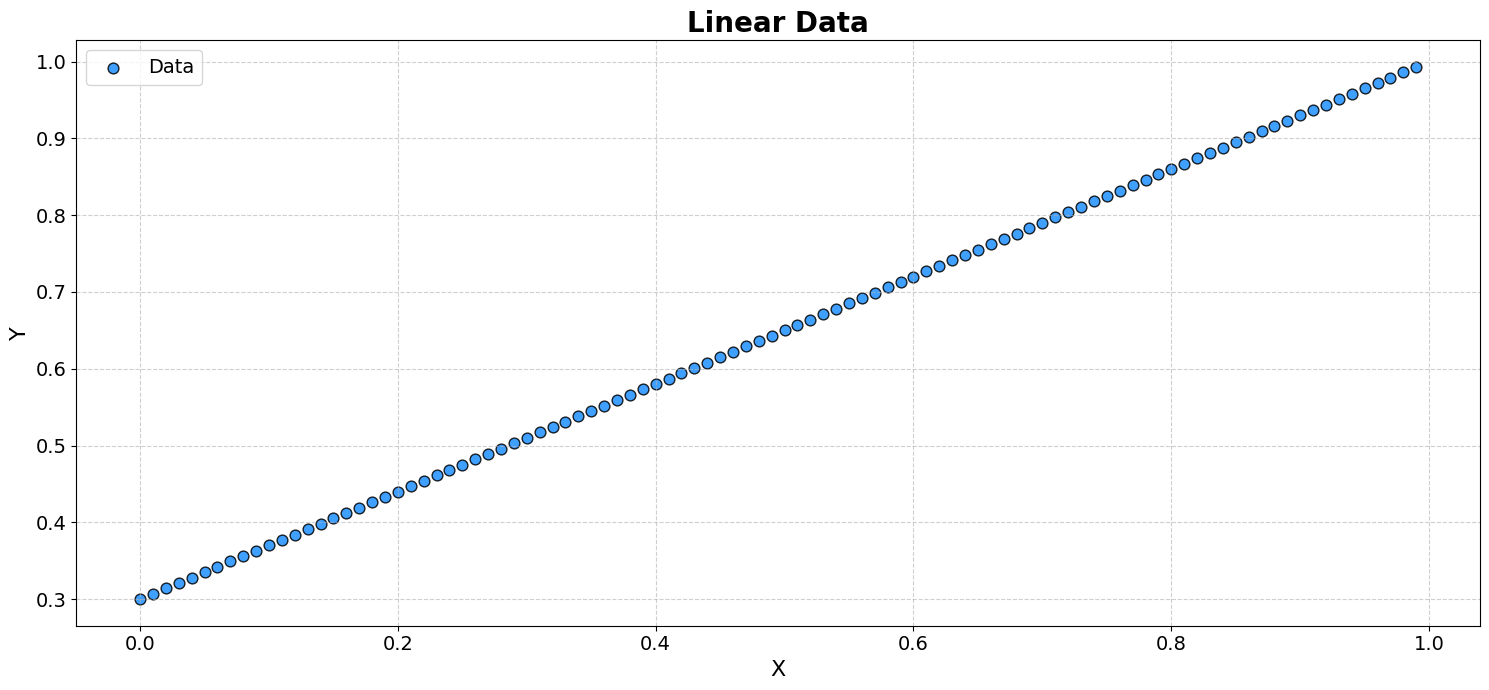

In [112]:
def plot_labeled_linear_splits(data_splits):
    """
    Plot multiple labeled linear data splits on the same scatter plot.

    Args:
        data_splits (dict): Dictionary where keys are labels (str) and
                            values are tuples (x, y, color).
    """
    plt.figure(figsize=(15, 7))
    for label, (xs, ys, color) in data_splits.items():
        assert len(xs) == len(ys), f"Mismatched lengths for {label}"
        plt.scatter(xs, ys, c=color, s=60, edgecolor='k', alpha=0.85, label=label)
    plt.title("Linear Data", fontsize=20, fontweight='bold')
    plt.xlabel("X", fontsize=16)
    plt.ylabel("Y", fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    plt.show()

all_linear_data = {
    "Data": (X, Y, "dodgerblue"),
}
plot_labeled_linear_splits(all_linear_data)

In [113]:
# create splits
tarin_split=int(len(X) * 0.8)

x_train, x_test = X[:tarin_split], X[tarin_split:]
y_train, y_test = y[:tarin_split], y[tarin_split:]
print(f"Train set size: {len(x_train),len(y_train)}, Test set size: {len(x_test),len(y_test)}")

Train set size: (80, 80), Test set size: (20, 20)


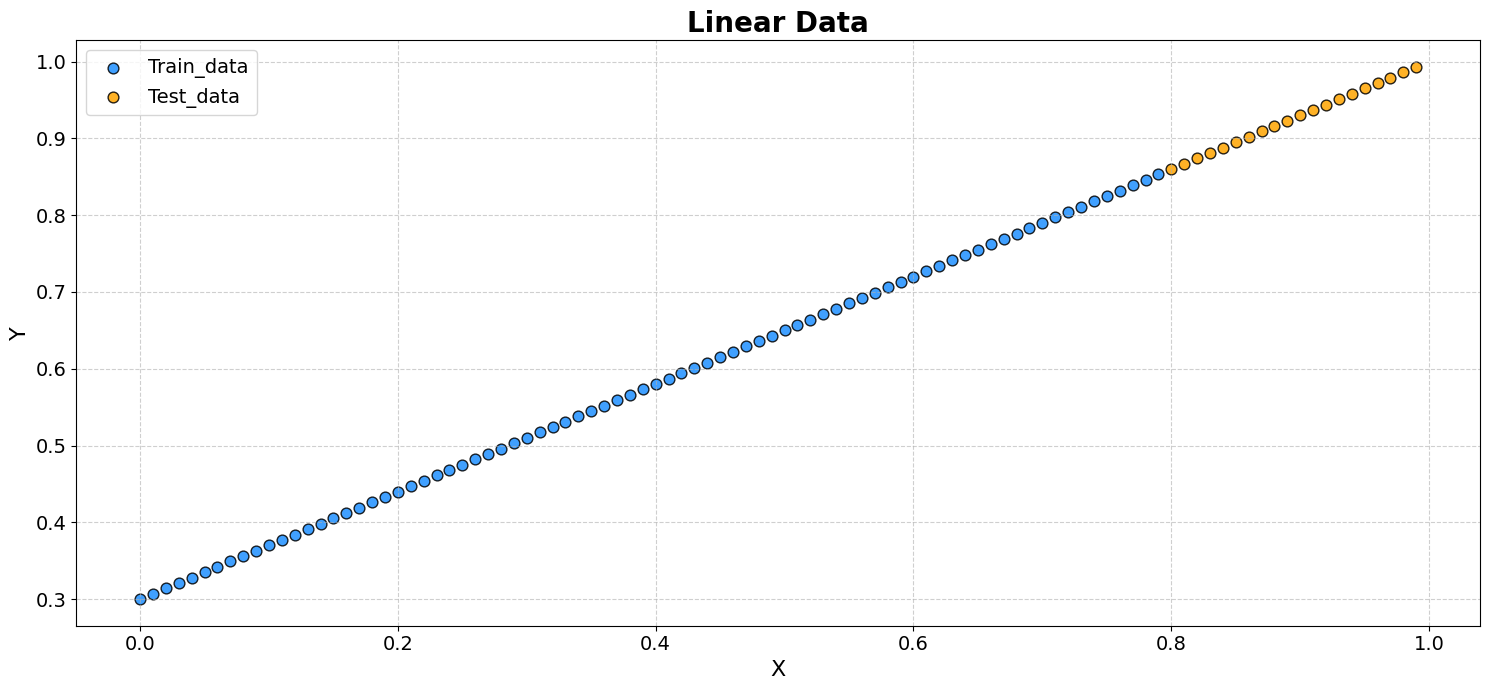

In [114]:
data_dict = {
    "Train_data": (x_train, y_train, "dodgerblue"),
    "Test_data": (x_test, y_test, "orange"),
}
plot_labeled_linear_splits(data_dict)

In [115]:
import torch
from torch import nn

# Our first PyTorch linear regression model
class LinearRegressionModel(nn.Module):  # <= All PyTorch models must inherit from nn.Module, which provides the core neural network building blocks
    def __init__(self):
        super().__init__()  # <= Calls the __init__ method of nn.Module to properly initialize the base class

        # Define the weight parameter (slope 'w' in y = wx + b)
        # nn.Parameter wraps a tensor to tell PyTorch this is a learnable parameter
        # torch.randn(1) initializes it with a random value from a normal distribution
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True),  # <= requires_grad=True enables gradient computation for backpropagation
            requires_grad=True  # <= This is redundant here (Parameter sets it True by default) but shown for explicitness
        )

        # Define the bias parameter (intercept 'b' in y = wx + b)
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float32, requires_grad=True),
            requires_grad=True  # <= Same note: redundant but clarifies intent
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:#<= any PyTorch model must implement a forward method that overrides nn.Module's forward method
        """
        Forward pass: computes the predicted output given input X.
        Linear regression equation: y = w * X + b
        """
        return self.weights * X + self.bias


### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). | 
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data 


> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html). 


In [116]:
SEED=42
torch.manual_seed(SEED)
linear_model = LinearRegressionModel().to(device)  # <= Move the model to the specified device (GPU or CPU)

In [117]:
list(linear_model.parameters() ) # <= Returns an iterator over the model's parameters (weights and biases)

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [118]:
list(linear_model.named_parameters())

[('weights',
  Parameter containing:
  tensor([0.3367], device='cuda:0', requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0.1288], device='cuda:0', requires_grad=True))]

In [119]:
linear_model.state_dict()  # <= Returns a dictionary containing the model's parameters and buffers

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [120]:
#not best practice, but useful for debugging
linear_model._parameters  # <= Returns an iterator over the model's parameters (weights and biases)

{'weights': Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 'bias': Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)}

In [121]:
y_test[:10]

tensor([[0.8600],
        [0.8670],
        [0.8740],
        [0.8810],
        [0.8880],
        [0.8950],
        [0.9020],
        [0.9090],
        [0.9160],
        [0.9230]])

In [122]:
with torch.inference_mode():
    y_preds = linear_model(x_test.to(device))  # <= Make predictions on the test set using the model
    print(f"Predictions: {y_preds[:10]}")  # <= Print the first 10 predictions for inspection

Predictions: tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285]], device='cuda:0')


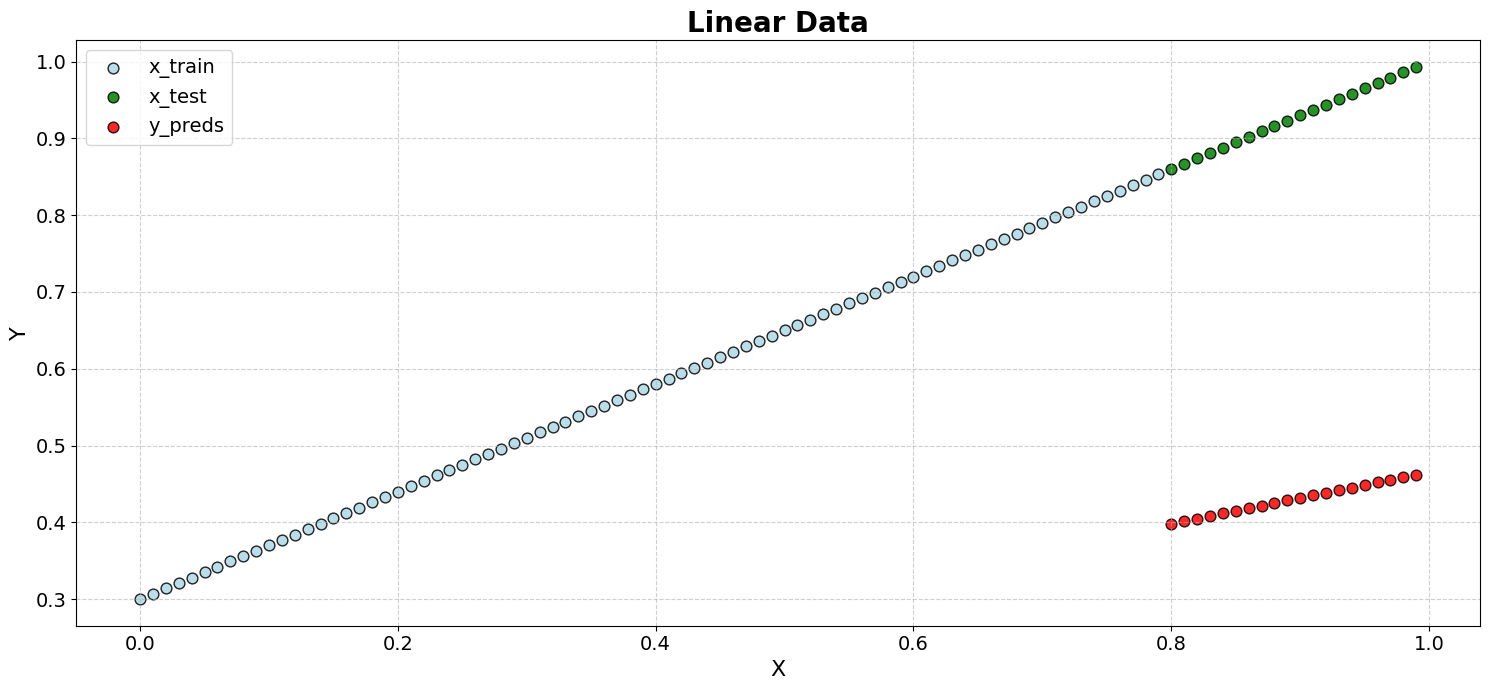

In [129]:
data={
    "x_train": (x_train, y_train, "lightblue"),
    "x_test": (x_test, y_test, "green"),
    "y_preds": (x_test, y_preds.cpu(), "red"),
}

plot_labeled_linear_splits(data)

In [133]:
# NOTE: This is NOT best practice for inference, but can be useful for debugging or during training.
# Why? Because this code does NOT use torch.inference_mode() or torch.no_grad(), so PyTorch will track gradients.
# Tracking gradients is only needed for training (when you want to compute gradients for backpropagation).
# For inference (making predictions), you should use torch.inference_mode() or torch.no_grad() to save memory and speed up computation.
# Here, we do a forward pass on the training data to inspect the model's raw predictions.
y_pred = linear_model(x_train.to(device))  # Forward pass: get predictions for training data (gradients tracked)
print(f"First 10 predictions on training data: {y_pred[:10]}")

First 10 predictions on training data: tensor([[0.1288],
        [0.1322],
        [0.1355],
        [0.1389],
        [0.1423],
        [0.1456],
        [0.1490],
        [0.1524],
        [0.1557],
        [0.1591]], device='cuda:0', grad_fn=<SliceBackward0>)


In [135]:
# torch.inference_mode() is preferred over torch.no_grad() for inference,
# because it not only disables gradient calculation (like no_grad), but also
# disables version counter updates and some autograd metadata, making inference faster and more memory efficient.
with torch.no_grad():
    y_pred = linear_model(x_train.to(device))  # Forward pass: get predictions for training data (no gradients tracked)
    print(f"First 10 predictions on training data (no_grad): \n{y_pred[:10]}")  # <= Print the first 10 predictions for inspection

First 10 predictions on training data (no_grad): 
tensor([[0.1288],
        [0.1322],
        [0.1355],
        [0.1389],
        [0.1423],
        [0.1456],
        [0.1490],
        [0.1524],
        [0.1557],
        [0.1591]], device='cuda:0')


In [136]:
# Best practice for inference: torch.inference_mode() is preferred over regular forward pass and torch.no_grad()
# because it disables gradient calculation AND version counter updates, making inference faster and more memory efficient.
with torch.inference_mode():
    y_preds = linear_model(x_test.to(device))  # <= Make predictions on the test set using the model
    print(f"Predictions: \n{y_preds[:10]}")  # <= Print the first 10 predictions for inspection

Predictions: 
tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285]], device='cuda:0')
